Task Description 

In this task, a grayscale image is converted into a binary image using Otsu’s thresholding. Morphological opening is applied to remove small noise. Connected Component Labeling (CCL) is then performed to identify and count individual objects in the image. Finally, the grayscale image, cleaned binary image, and labeled components are displayed for visualization and analysis.

In [ ]:
# --- Step 1: Import Libraries ---
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# --- Step 2: Read the Binary Image (2.jpg) ---
# Make sure 1.jpg is in the same folder as your notebook
img = cv2.imread('/content/WhatsApp Image 2026-02-02 at 7.04.25 PM.jpeg', cv2.IMREAD_GRAYSCALE)

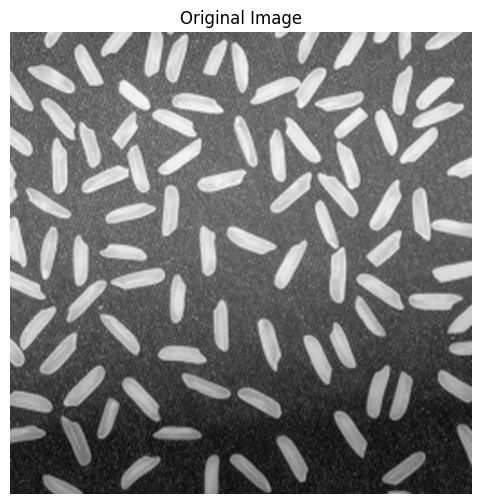

In [10]:
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [4]:
# --- Step 3: Convert to Binary using Thresholding ---
# You can try Otsu’s automatic threshold
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)



In [5]:
# --- Step 4: Remove small noise using Morphological Opening ---
kernel = np.ones((3,3), np.uint8)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)


In [6]:
# --- Step 5: Apply Connected Component Labeling ---
num_labels, labels = cv2.connectedComponents(cleaned)

In [7]:
print("✅ Total number of rice grains (main objects):", num_labels - 1)

✅ Total number of rice grains (main objects): 95


In [8]:
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)
labeled_img[label_hue == 0] = 0

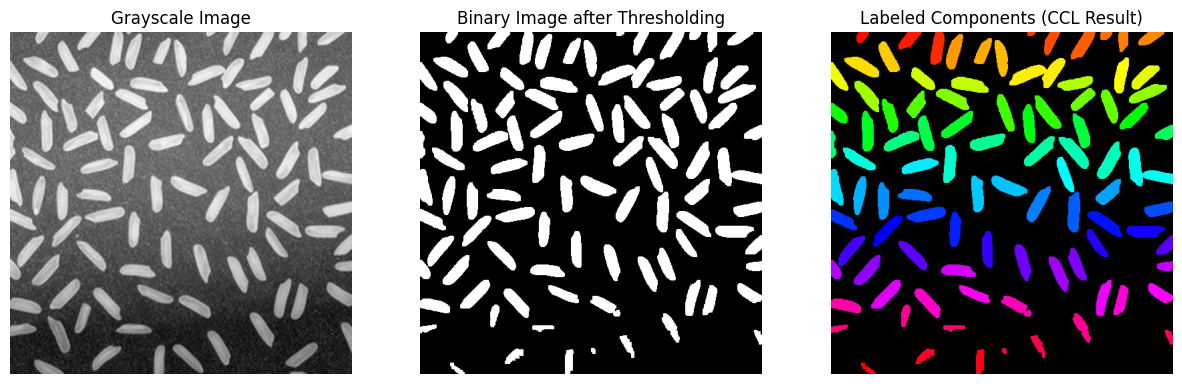

In [9]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title("Grayscale Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Binary Image after Thresholding")
plt.imshow(cleaned, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Labeled Components (CCL Result)")
plt.imshow(labeled_img)
plt.axis('off')

plt.show()